# Motivación: Redes Neuronales Convolucionales

La información que extraemos de las entradas sensoriales a menudo está determinada por su contexto. Con las imágenes, podemos suponer que los píxeles cercanos están estrechamente relacionados y su información colectiva es más relevante cuando se toma como una unidad. Por el contrario, podemos suponer que los píxeles individuales no transmiten información relacionada entre sí. Por ejemplo, para reconocer letras o dígitos, necesitamos analizar la dependencia de píxeles cercanos, porque determinan la forma del elemento. De esta manera, podríamos calcular la diferencia entre, por ejemplo, un 0 o un 1. Los píxeles de una imagen están organizados en una cuadrícula bidimensional, y si la imagen no es en escala de grises, tendremos una tercera dimensión para Los mapas de colores. Alternativamente, una imagen de resonancia magnética (MRI) también usa espacio tridimensional. Puede recordar que, hasta ahora, si queríamos alimentar una imagen a una red neuronal, teníamos que cambiarla de una matriz bidimensional a una matriz unidimensional. Las CNN están diseñadas para abordar este problema: cómo hacer que la información perteneciente a las neuronas que están más cerca sea más relevante que la información proveniente de las neuronas que están más separadas. En problemas visuales, esto se traduce en hacer que las neuronas procesen información proveniente de píxeles que están cerca uno del otro. Con CNNs, podremos alimentar entradas de una, dos o tres dimensiones y la red producirá una salida de la misma dimensionalidad. Como veremos más adelante, esto nos dará varias ventajas

Cuando tratamos de clasificar las imágenes CIFAR-10 usando una red de capas completamente conectadas con poco éxito. Una de las razones es que se sobreajustan. Si miramos la primera capa oculta de esa red, que tiene 1.024 neuronas. El tamaño de entrada de la imagen es 32x32x3 = 3,072. Por lo tanto, la primera capa oculta tenía un total de 2072 * 1024 = 314, 5728 pesos. ¡Ese no es un número pequeño! No solo es fácil sobreajustar una red tan grande, sino que también es ineficiente en la memoria. Además, cada neurona de entrada (o píxel) está conectada a cada neurona en la capa oculta. Debido a esto, la red no puede aprovechar la proximidad espacial de los píxeles, ya que no tiene una manera de saber qué píxeles están cerca uno del otro. Por el contrario, las CNN tienen propiedades que proporcionan una solución efectiva a estos problemas:

- Conectan neuronas, que solo corresponden a píxeles vecinos de la imagen. De esta manera, las neuronas están "forzadas" a recibir información de otras neuronas que están espacialmente cercanas. Esto también reduce el número de pesos, ya que no todas las neuronas están interconectadas.

- Una CNN utiliza el uso compartido de parámetros. En otras palabras, se comparte un número limitado de pesos entre todas las neuronas de una capa. Esto reduce aún más la cantidad de pesas y ayuda a combatir el sobreajuste. Puede sonar confuso, pero quedará claro en la siguiente sección.

La capa convolucional es el bloque de construcción más importante de una CNN. Consiste en un conjunto de filtros (también conocidos como núcleos o detectores de características), donde cada filtro se aplica en todas las áreas de los datos de entrada. Un filtro se define por un conjunto de pesos aprendibles. Como un guiño al tema en cuestión, la siguiente imagen ilustra esto muy bien:

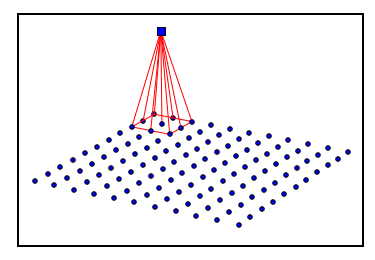


Se muestra una capa de entrada bidimensional de una red neuronal. Por el bien de la simplicidad, asumiremos que esta es la capa de entrada, pero puede ser cualquier capa de la red. Como hemos visto en los capítulos anteriores, cada neurona de entrada representa la intensidad de color de un píxel (asumiremos que es una imagen en escala de grises por simplicidad). Primero, aplicaremos un filtro 3x3 en la parte superior derecha esquina de la imagen. Cada neurona de entrada está asociada con un solo peso del filtro. Tiene nueve pesos, debido a las nueve neuronas de entrada, pero, en general, el tamaño es arbitrario (2x2, 4x4, 5x5, etc.). La salida del filtro es una suma ponderada de sus entradas (el activaciones de las neuronas de entrada). Su propósito es resaltar una característica específica en la entrada, por ejemplo, una arista o una línea. El grupo de neuronas cercanas, que participan en la entrada. se llaman el campo receptivo. En el contexto de la red, la salida del filtro representa el valor de activación de una neurona en la siguiente capa. La neurona estará activa, si la función es presente en esta ubicación espacial.

Para cada nueva neurona, deslizaremos el filtro por la imagen de entrada y calcularemos su salida (la suma ponderada) con cada nuevo conjunto de neuronas de entrada. En el siguiente diagrama, puede ver cómo calcular las activaciones de las siguientes dos posiciones (un píxel para derecho):

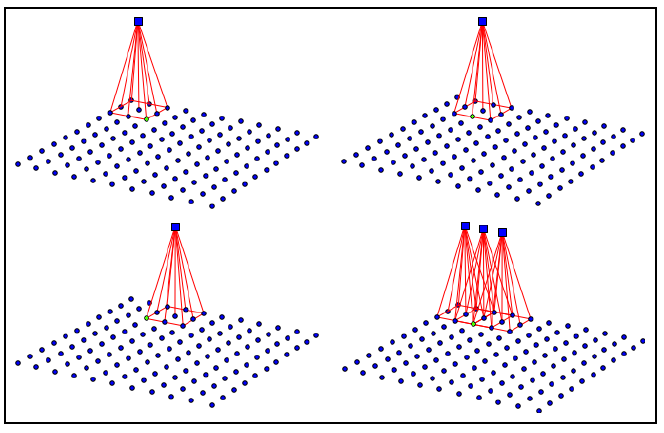

- Al decir "arrastrar", queremos decir que los pesos del filtro no cambian en la imagen. En efecto, utilizaremos los mismos nueve pesos de filtro para calcular las activaciones de todas las neuronas de salida, cada vez con un conjunto diferente de neuronas de entrada. Llamamos a este parámetro compartir, y lo hacemos por dos razones:

- Al reducir el número de pesos, reducimos la huella de la memoria y evitamos el sobreajuste. El filtro resalta características específicas. Podemos suponer que esta característica es útil, independientemente de su posición en la imagen. Al compartir pesos, garantizamos que el filtro podrá ubicar la función en toda la imagen.

Hasta ahora, hemos descrito la relación de corte uno a uno, donde la salida es un solo corte, que toma la entrada de otro segmento (o una imagen). Esto funciona bien en escala de grises, pero cómo ¿Lo adaptamos para imágenes en color (relación n a 1)? ¡Una vez más, es simple! Primero, dividiremos el imagen en canales de color. En el caso de RGB, serían tres. Podemos pensar en cada color canal como un segmento de profundidad, donde los valores son las intensidades de píxeles para el color dado (R, G, o B), como se muestra en el siguiente ejemplo:

La combinación de sectores se denomina volumen de entrada con una profundidad de 3. Un filtro único de 3x3 es
aplicado a cada rebanada. La activación de una neurona de salida es solo la suma ponderada de filtros aplicados en todos los sectores. En otras palabras, combinaremos los tres filtros en un gran 3 x 3 x 3 + 1 filtro con 28 pesos (agregamos profundidad y un solo sesgo). Entonces, calcularemos el suma ponderada aplicando los pesos relevantes a cada segmento.

    - Los mapas de características de entrada y salida tienen diferentes dimensiones. Digamos que tenemos una capa de entrada con tamaño (ancho, alto) y un filtro con dimensiones (filter_w, filter_h). Después de aplicar la convolución, las dimensiones de la capa de salida son (ancho - filtro_w + 1, altura - filtro_h + 1).

Como mencionamos, un filtro resalta una característica específica, como bordes o líneas. Pero, en general, muchas características son importantes y nos interesarán todas. ¿Cómo los destacamos a todos? Como de costumbre, es simple. Aplicaremos varios filtros en el conjunto de sectores de entrada. Cada filtro generará un segmento de salida único, que resalta la característica, detectada por el filtro (relación de n a m). Un sector de salida puede recibir información de: 

- Todos los sectores de entrada, que es el estándar para capas convolucionales. En este escenario, un segmento de salida único es un caso de la relación n-a-1, que describimos anteriormente. Con múltiples segmentos de salida, la relación se convierte en n-m. En otras palabras, cada segmento de entrada contribuye a la salida de cada segmento de salida. 

- Una sola porción de entrada. Esta operación se conoce como convolución profunda. Es un
tipo de reversión del caso anterior. En su forma más simple, aplicamos un filtro sobre un único segmento de entrada para producir un único segmento de salida. Este es un caso de la relación uno a uno, que describimos en la sección anterior. Pero también podemos especificar un multiplicador de canal (un entero m), donde aplicamos filtros m sobre un solo sector de salida para producir m sectores de salida. Este es un caso de relación de 1 a m. El número total de segmentos de salida es n * m. 

Denotemos el ancho y la altura del filtro con Fw y Fh, la profundidad del volumen de entrada con D y la profundidad del volumen de salida con M. Luego, podemos calcular el número total de pesos W en una capa convolucional con el siguiente ecuación: 
\begin{equation}
W=(D*F_w *F_h+1)*M
\end{equation}

Digamos que tenemos tres sectores y queremos aplicarles cuatro filtros de 5x5. Entonces la la capa convolucional tendrá un total de (3x5x5 + 1) * 4 = 304 pesos, y cuatro cortes de salida (volumen de salida con una profundidad de 4), un sesgo por corte. El filtro para cada segmento de salida tendrá tres parches de filtro de 5x5 para cada uno de los tres segmentos de entrada y un sesgo para un total de 3x5x5 + 1 = 76 pesos. La combinación de los mapas de salida se denomina volumen de salida con una profundidad de cuatro.

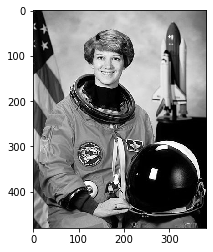

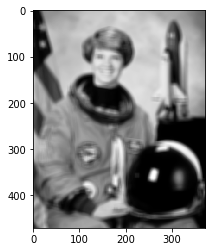

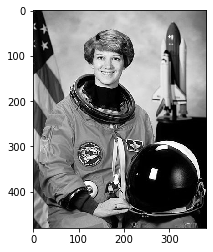

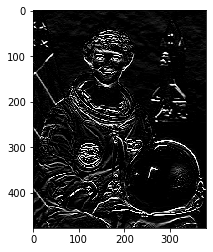

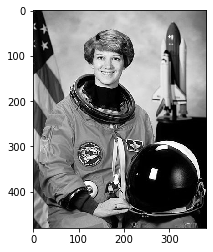

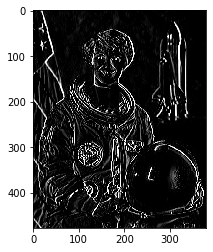

In [2]:
import numpy as np
def conv(image, im_filter):
    """
    :param image: grayscale image as a 2-dimensional numpy array
    :param im_filter: 2-dimensional numpy array
    """
    # input dimensions
    height = image.shape[0]
    width = image.shape[1]
    # output image with reduced dimensions
    im_c = np.zeros((height - len(im_filter) + 1,width - len(im_filter) + 1))
    # iterate over all rows and columns
    for row in range(len(im_c)):
        for col in range(len(im_c[0])):
            # apply the filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    im_c[row, col] += image[row + i, col + j] *im_filter[i][j]
    # fix out-of-bounds values
    im_c[im_c > 255] = 255
    im_c[im_c < 0] = 0
    # plot images for comparison
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    plt.figure()
    plt.imshow(image, cmap=cm.Greys_r)
    plt.show()
    plt.imshow(im_c, cmap=cm.Greys_r)
    plt.show()

import requests
from PIL import Image
from io import BytesIO
# Cargar la imagen
url ="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Commander_Eileen_Collins_-_GPN-2000-001177.jpg/382px-Commander_Eileen_Collins_-_GPN-2000-001177.jpg?download"
resp = requests.get(url)
image_rgb =np.asarray(Image.open(BytesIO(resp.content)).convert("RGB"))
# Convertirla a escala de grises
image_grayscale = np.mean(image_rgb, axis=2, dtype=np.uint)
# Aplicar filtro de blur
blur = np.full([10, 10], 1. / 100)
conv(image_grayscale, blur)
sobel_x = [[-1, -2, -1],[0, 0, 0],
[1, 2, 1]]
conv(image_grayscale, sobel_x)
sobel_y = [[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]]
conv(image_grayscale, sobel_y)

# Stride y relleno en capas convolucionales
Hasta ahora, asumimos que el deslizamiento del filtro ocurre un píxel a la vez, pero ese no es siempre el caso. Podemos deslizar el filtro en múltiples posiciones. Este parámetro de las capas convolucionales se llama zancada. Por lo general, el paso es el mismo en todas las dimensiones de la entrada. En el siguiente diagrama, podemos ver una capa convolucional con un paso de 2:

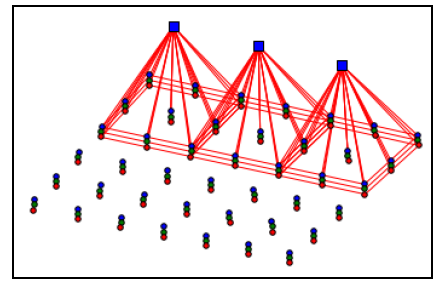

Al usar una zancada mayor que 1, reducimos el tamaño del segmento de salida. En la sección anterior, presentamos una fórmula simple para el tamaño de salida, que incluía los tamaños de la entrada y el núcleo. Ahora, lo ampliaremos para incluir también el paso: ((ancho - filtro_w) / stride_w + 1, ((altura - filtro_h) / stride_h + 1).
Por ejemplo, el tamaño de salida de un corte cuadrado generado por una imagen de entrada de 28x28, convolucionado con un filtro 3x3 con zancada 1, sería 28-3 + 1 = 26. Pero con zancada 2, obtenemos (28-3) / 2 + 1 = 13. El efecto principal del paso más grande es un aumento en el campo receptivo de las neuronas de salida. Vamos a explicar esto con un ejemplo. Si usamos Stride 2, el tamaño del segmento de salida será aproximadamente cuatro veces menor que el de entrada. En otras palabras, una neurona de salida "cubrirá" el área, que es cuatro veces más grande, en comparación con las neuronas de entrada. Las neuronas en el
Las siguientes capas capturarán gradualmente la entrada de regiones más grandes de la imagen de entrada. Esto es importante, porque les permitiría detectar características más grandes y más complejas de la entrada.

Las operaciones de convolución que hemos discutido hasta ahora han producido una salida menor que la entrada. Pero, en la práctica, a menudo es deseable controlar el tamaño de la salida. Podemos resolver esto rellenando los bordes del segmento de entrada con filas y columnas de ceros antes de la operación de convolución. La forma más común de usar relleno es producir resultados con las mismas dimensiones que la entrada. En el siguiente diagrama, podemos ver una capa convolucional con relleno de 1:
    
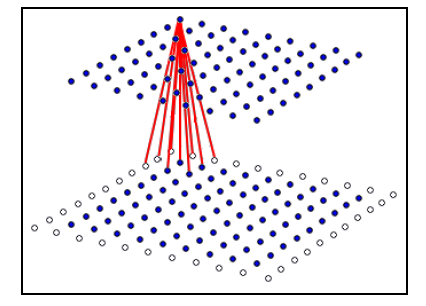

Las neuronas blancas representan el relleno. Los segmentos de entrada y salida tienen las mismas dimensiones (neuronas oscuras). Esta es la forma más común de usar relleno. Los ceros recién rellenados participarán en la operación de convolución con el corte, pero no afectarán el resultado. La razón es que, aunque las áreas rellenadas estén conectadas con pesos a la siguiente capa, siempre multiplicaremos esos pesos por el valor rellenado, que es 0. Ahora agregaremos relleno a la fórmula del tamaño de salida. Deje que el tamaño del segmento de entrada sea I = (Iw, Ih), el tamaño del filtro F = (Fw, Fh), la zancada S = (Sw, Sh) y el relleno P = (Pw, Ph). Entonces el tamaño O = (Ow, Oh) del segmento de salida viene dado por las siguientes ecuaciones:


\begin{equation}
O_w=\frac{I_w+2P_w-F_w}{S_w}+1
\end{equation}


\begin{equation}
O_h=\frac{I_h+2P_h-F_h}{S_h}+1
\end{equation}

# Capas de pooling
En la sección anterior, explicamos cómo aumentar el campo receptivo de las neuronas usando un paso más grande que 1. Pero también podemos hacer esto con la ayuda de la agrupación de capas. Una capa de agrupación divide la porción de entrada en una cuadrícula, donde cada celda de la cuadrícula representa un campo receptivo de varias neuronas (tal como lo hace una capa convolucional). Luego, se aplica una operación de agrupación sobre cada celda de la cuadrícula. Existen diferentes tipos de capas de agrupación. Las capas de agrupación no cambian la profundidad del volumen, porque la operación de agrupación se realiza de forma independiente en cada segmento.

- Max pooling: es la forma más popular de pooling. La operación de agrupación máxima lleva a la neurona con el valor de activación más alto en cada campo receptivo local (celda de cuadrícula) y propaga solo ese valor hacia adelante. En la siguiente figura, podemos ver un ejemplo de agrupación máxima con un campo receptivo de 2x2:
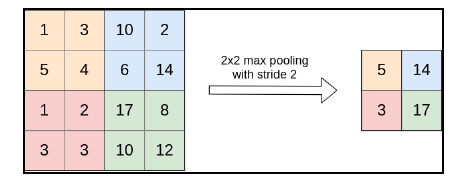

- Average Pooling: es otro tipo de agrupación, donde la salida de cada campo receptivo es el valor medio de todas las activaciones dentro del campo. El siguiente es un ejemplo de agrupación promedio

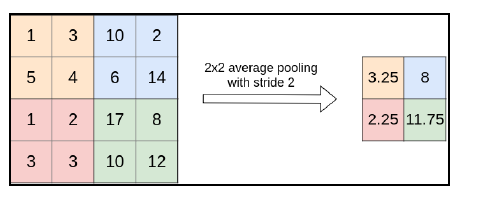


Las capas de agrupación se definen por dos parámetros:
- Stride, que es lo mismo que con las capas convolucionales
- Tamaño del campo receptivo, que es el equivalente del tamaño del filtro en capas convolucionales.

# Estructura de una red neuronal convolucional

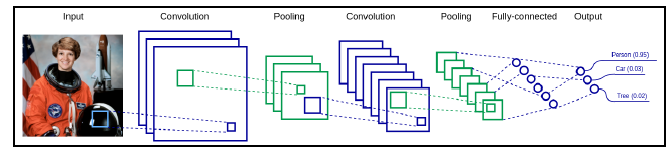

Normalmente, alternaríamos una o más capas convolucionales con una capa de agrupación. De esta forma, las capas convolucionales pueden detectar características en cada nivel del tamaño del campo receptivo. El tamaño del campo receptivo agregado de las capas más profundas es mayor que las del comienzo de la red. Esto les permite capturar características más complejas de regiones de entrada más grandes. Vamos a ilustrar esto con un ejemplo. Imagine que la red utiliza convoluciones de 3x3 con zancada 1 y agrupación de 2x2 con zancada 2: 

- las neuronas de la primera capa convolucional recibirán información de 3x3 píxeles de la imagen. 
- Un grupo de neuronas de salida 2x2 de la primera capa tendrá un tamaño de campo receptivo combinado de 4x4 (debido a la zancada). 
- Después de la primera operación de agrupación, este grupo se combinará en una sola neurona de la capa de agrupación.
- La segunda operación de convolución toma información de las neuronas de agrupación 3x3. Por lo tanto, recibirá la entrada de un cuadrado con lados 3x4 = 12 (o un total de 12x12 = 144) píxeles de la imagen de entrada.

Utilizamos las capas convolucionales para extraer características de la entrada. Las características detectadas por las capas más profundas son muy abstractas, pero tampoco son legibles por los humanos. Para resolver este problema, generalmente agregamos una o más capas completamente conectadas después de la última capa convolucional / agrupación. En este ejemplo, la última capa (salida) completamente conectada utilizará softmax para estimar las probabilidades de clase de la entrada. Puede pensar en las capas totalmente conectadas como traductores entre el idioma de la red (que no entendemos) y el nuestro. Las capas convolucionales más profundas generalmente tienen más filtros (por lo tanto, mayor profundidad de volumen), en comparación con los iniciales. Un detector de características al comienzo de la red funciona en un pequeño campo receptivo. Solo puede detectar un número limitado de características, como bordes o líneas, compartidas entre todas las clases. Por otro lado, una capa más profunda detectaría características más complejas y numerosas. Por ejemplo, si tenemos varias clases, como automóviles, árboles o personas, cada una tendrá su propio conjunto de características, como neumáticos, puertas, hojas y caras, etc. Esto requeriría más detectores de características.

In [11]:

#Importen tensorflow, keras, de keras, importen Sequential, Dense, Activation, 
#Convolution2D, MaxPooling, Flatten y np_utils


#Primero: Carguen datos de mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

#Segundo: creen una red neuronal convolucional

model = Sequential([Convolution2D(filters=32,kernel_size=(3, 3),input_shape=(28, 28, 1)),Activation('relu'),Convolution2D(filters=32,kernel_size=(3, 3)), Activation('relu'),MaxPooling2D(pool_size=(4, 4)),  Flatten(),  Dense(64),  Activation('relu'), Dense(10),  Activation('softmax')])
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adadelta')

model.fit(X_train, Y_train, batch_size=100, epochs=5,validation_split=0.1, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1])










Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.8359 - acc: 0.9055 - val_loss: 0.0755 - val_acc: 0.9798
Epoch 2/5
54000/54000 [==============================] - 5s 101us/step - loss: 0.0673 - acc: 0.9793 - val_loss: 0.0608 - val_acc: 0.9840
Epoch 3/5
54000/54000 [==============================] - 6s 103us/step - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0528 - val_acc: 0.9852
Epoch 4/5
54000/54000 [==============================] - 6s 102us/step - loss: 0.0301 - acc: 0.9906 - val_loss: 0.0545 - val_acc: 0.9872
Epoch 5/5
10000/10000 [==============================] - 1s 65us/step
Test accuracy: 0.9889


# Preprocesamiento de datos
Hasta ahora, hemos alimentado la red con entradas no modificadas. En el caso de las imágenes, estas son intensidades de píxeles en el rango [0: 255]. Pero eso no es óptimo. Imagine que tenemos una imagen RGB, donde las intensidades en uno de los canales de color son muy altas en comparación con los otros dos. Cuando alimentamos la imagen a la red, los valores de este canal serán dominantes, disminuyendo los demás. Esto podría sesgar los resultados, porque en realidad cada canal tiene la misma importancia. Para resolver esto, necesitamos preparar (o normalizar) los datos, antes de alimentarlos a la red. En la práctica, usaremos dos tipos de normalización: 

- Feature Scaling: Esta operación escala todas las entradas en el rango [0,1]. Por ejemplo, un píxel con intensidad 125 tendría un valor escalado de. El escalado de características es rápido y fácil de implementar.

- Standard Score: Aquí μ y σ son la media y la desviación estándar de todos los datos de entrenamiento. Por lo general, se calculan por separado para cada dimensión de entrada. Por ejemplo, en una imagen RGB, calcularíamos la media μ y σ para cada canal. Debemos tener en cuenta que μ y σ deben calcularse solo en los datos de entrenamiento y luego aplicarse a los datos de la prueba.

# Dropout

Dropout es una técnica de regularización, que se puede aplicar a la salida de algunas de las capas de red. El dropout aleatorio y periódico elimina algunas de las neuronas (junto con sus conexiones de entrada y salida) de la red. Durante un mini lote de entrenamiento, cada neurona tiene una probabilidad p de ser descartada estocásticamente. Esto es para asegurar que ninguna neurona termine confiando demasiado en otras neuronas y "aprenda" algo útil para la red. El abandono se puede aplicar después de capas convolucionales, de agrupación o completamente conectadas. En la siguiente ilustración, podemos ver un abandono de capas completamente conectadas:

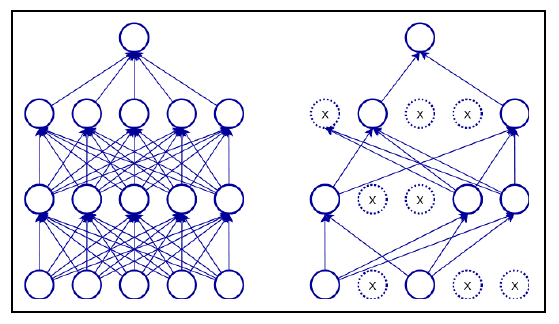

# Aumento de datos

Una de las técnicas de regularización más eficientes es el aumento de datos. Si los datos de entrenamiento son demasiado pequeños, la red podría comenzar a sobreajustarse. El aumento de datos ayuda a contrarrestar esto al aumentar artificialmente el tamaño del conjunto de entrenamiento. Usemos un ejemplo. En los ejemplos de MNIST y CIFAR-10, hemos entrenado la red en varias épocas. La red "verá" cada muestra del conjunto de datos una vez por época. Para evitar esto, podemos aplicar aumentos aleatorios a las imágenes, antes de usarlas para el entrenamiento. Las etiquetas permanecerán igual. Algunos de los aumentos de imagen más populares son:

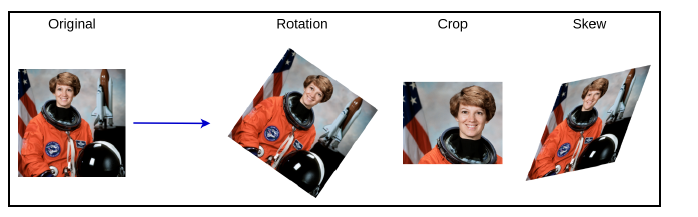

In [24]:
import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

batch_size = 50
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

data_generator = ImageDataGenerator(rotation_range=90, width_shift_range=0.1,height_shift_range=0.1, featurewise_center=True, featurewise_std_normalization=True, horizontal_flip=True)
data_generator.fit(X_train)
# standardize the test set
for i in range(len(X_test)):
    X_test[i] = data_generator.standardize(X_test[i])

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])

model.fit_generator( generator=data_generator.flow(x=X_train, y=Y_train, batch_size=batch_size),steps_per_epoch=len(X_train),epochs=100, validation_data=(X_test, Y_test),workers=4)

Using TensorFlow backend.


ImportError: Could not find 'cudart64_100.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Download and install CUDA 10.0 from this URL: https://developer.nvidia.com/cuda-90-download-archive